# Gloria (no Ack)

In [1]:
%load_ext autoreload

In [2]:
%matplotlib inline

In [3]:
%autoreload

In [4]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
import pandas as pd

In [5]:
from flora_tools.flocklab.flocklab import FlockLab

logs = FlockLab.parse_serial_log("../../data/MeasureFlockLabGloria_serial.csv")

# lines to process: 72262
0,1000,2000,3000,6000,7000,8000,10000,12000,15000,16000,17000,19000,20000,21000,22000,23000,24000,25000,26000,27000,28000,31000,34000,35000,37000,41000,44000,45000,46000,48000,50000,51000,54000,56000,57000,58000,62000,65000,66000,69000,71000,72000,Parsing finished!


In [6]:
%autoreload

In [7]:
from flora_tools.flocklab.measure_gloria import MeasureGloriaExperiment, ITERATIONS
receptions = MeasureGloriaExperiment.reconstruct_receptions(logs, "../../data/MeasureFlockLabGloria_receptions.csv")

100@1,200@1,300@1,400@1,500@1,600@1,700@1,800@1,900@1,1000@1,100@3,200@3,300@3,400@3,500@3,600@3,700@3,800@3,900@3,1000@3,1100@3,1200@3,1300@3,100@4,200@4,300@4,400@4,500@4,600@4,700@4,800@4,100@7,200@7,300@7,400@7,500@7,600@7,700@7,800@7,100@8,200@8,300@8,400@8,500@8,600@8,700@8,800@8,100@10,200@10,300@10,400@10,500@10,600@10,700@10,800@10,900@10,1000@10,100@11,200@11,300@11,400@11,500@11,600@11,700@11,800@11,900@11,1000@11,100@13,200@13,300@13,400@13,500@13,600@13,700@13,800@13,900@13,1000@13,1100@13,100@15,200@15,300@15,400@15,500@15,600@15,700@15,800@15,900@15,1000@15,1100@15,1200@15,100@20,200@20,300@20,400@20,500@20,600@20,700@20,800@20,900@20,1000@20,1100@20,1200@20,100@22,200@22,300@22,400@22,500@22,600@22,700@22,800@22,900@22,1000@22,1100@22,100@23,200@23,300@23,400@23,500@23,600@23,700@23,800@23,900@23,1000@23,1100@23,1200@23,1300@23,100@24,200@24,300@24,400@24,500@24,600@24,700@24,800@24,900@24,100@25,200@25,300@25,400@25,500@25,600@25,700@25,800@25,900@25,1000@25,1100@25,10

In [8]:
receptions = pd.read_csv("../../data/MeasureFlockLabGloria_receptions.csv")

In [9]:
%autoreload

In [10]:
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets

from flora_tools.radio_configuration import RadioConfiguration

from flora_tools.flocklab.flocklab import FLOCKLAB_TARGET_ID_LIST
from flora_tools.flocklab.measure_gloria import MeasureGloriaExperiment, POWER_LEVELS, POWERS, ITERATIONS
from flora_tools.lwb_slot import RADIO_MODULATIONS

#RADIO_MODULATIONS = [3, 5, 7, 9]
#POWERS = [10, 22]

POWERS = [10, 22]

NODE_OPTIONS = list(FLOCKLAB_TARGET_ID_LIST)
NODE_OPTIONS.append('all')

@interact(tx_node=NODE_OPTIONS, 
          modulation=(0, len(RADIO_MODULATIONS) - 1), 
          power_level=(0, len(POWERS) - 1), 
          hop_count=(1, 5))
def g(tx_node, modulation=0, power_level=0, hop_count=1):
    modulation = RADIO_MODULATIONS[modulation]
    
    config = RadioConfiguration(modulation)
    
    figure = plt.figure(figsize=[24,15])
    plt.suptitle("{}, {:d}dBm, {} hops".format(config.modulation_name, POWERS[power_level], hop_count), fontsize=20)
    
    MeasureGloriaExperiment.draw_links(receptions, modulation, power_level, hop_count, tx_node=tx_node)


interactive(children=(Dropdown(description='tx_node', options=(1, 3, 4, 7, 8, 10, 11, 13, 15, 20, 22, 23, 24, …

# Gloria with ACK

In [11]:
from flora_tools.flocklab.flocklab import FlockLab

logs = FlockLab.parse_serial_log("../../data/MeasureFlockLabGloriaAck_serial.csv")


# lines to process: 54370
0,1000,2000,4000,5000,6000,7000,9000,10000,12000,13000,14000,15000,16000,17000,19000,20000,22000,23000,27000,28000,30000,32000,33000,34000,35000,36000,37000,39000,41000,42000,43000,45000,47000,48000,49000,54000,Parsing finished!


In [12]:
from flora_tools.flocklab.measure_gloria import MeasureGloriaExperiment, ITERATIONS
ack_receptions = MeasureGloriaExperiment.reconstruct_receptions(logs, "../../data/MeasureFlockLabGloriaAck_receptions.csv")


100@1,200@1,300@1,400@1,500@1,600@1,700@1,100@3,200@3,300@3,400@3,500@3,600@3,700@3,800@3,900@3,100@4,200@4,300@4,400@4,500@4,600@4,100@7,200@7,300@7,400@7,500@7,600@7,100@8,200@8,300@8,400@8,500@8,600@8,100@10,200@10,300@10,400@10,500@10,600@10,700@10,100@11,200@11,300@11,400@11,500@11,600@11,700@11,800@11,100@13,200@13,300@13,400@13,500@13,600@13,700@13,100@15,200@15,300@15,400@15,500@15,600@15,700@15,800@15,100@20,200@20,300@20,400@20,500@20,600@20,700@20,800@20,900@20,100@22,200@22,300@22,400@22,500@22,600@22,700@22,800@22,100@23,200@23,300@23,400@23,500@23,600@23,700@23,800@23,900@23,100@24,200@24,300@24,400@24,500@24,600@24,700@24,100@25,200@25,300@25,400@25,500@25,600@25,700@25,800@25,100@26,200@26,300@26,400@26,500@26,600@26,700@26,800@26,900@26,100@28,200@28,300@28,400@28,500@28,600@28,700@28,800@28,900@28,1000@28,100@32,200@32,300@32,400@32,500@32,600@32,700@32,800@32,900@32,100@33,200@33,300@33,400@33,500@33,600@33,700@33,800@33,900@33,

In [13]:
ack_receptions = pd.read_csv("../../data/MeasureFlockLabGloriaAck_receptions.csv")

In [14]:
%autoreload

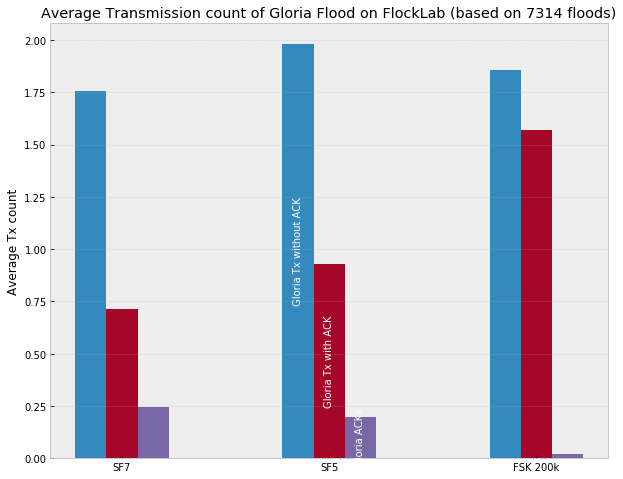

In [15]:
MeasureGloriaExperiment.analyze_tx_count(receptions, ack_receptions)
